In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
custom_style = {'axes.labelcolor': 'white',
                'xtick.color': 'white',
                'ytick.color': 'white'}
sns.set_style("darkgrid", rc=custom_style)
plt.style.use('dark_background')

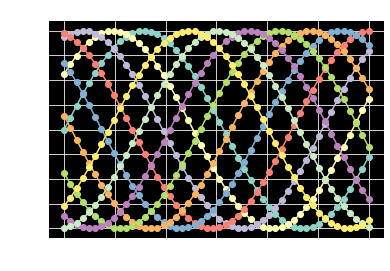

In [2]:
fig, ax = plt.subplots()

L = 6
x = np.linspace(0, L)
ncolors = len(plt.rcParams['axes.prop_cycle'])
shift = np.linspace(0, L, ncolors, endpoint=False)
for s in shift:
    ax.plot(x, np.sin(x + s), 'o-')
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_title("'dark_background' style sheet")
from sklearn import  datasets
plt.show()

In [3]:
iris = datasets.load_iris()

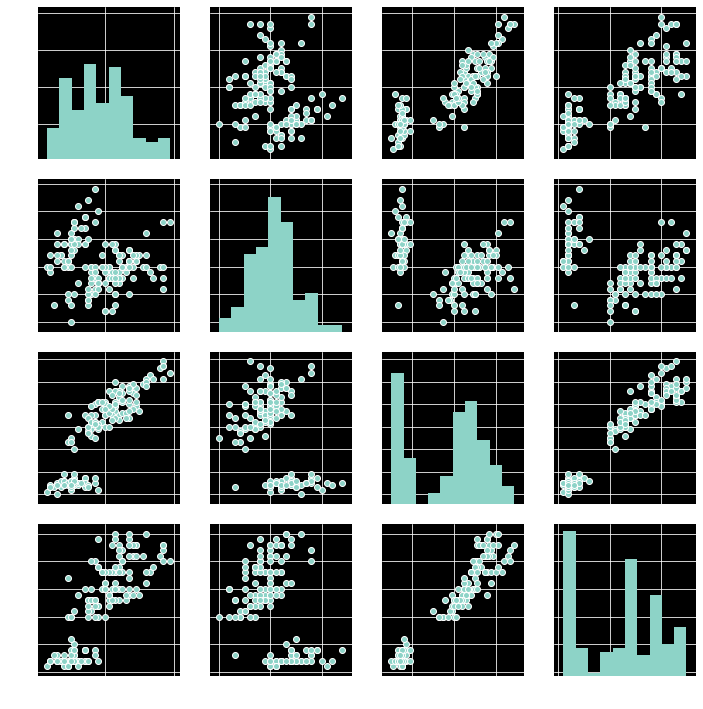

In [4]:
sns.pairplot(pd.DataFrame(iris.data))

In [5]:
X = iris.data[:,[2,3]]
y = iris.target

In [6]:
np.unique(y)

array([0, 1, 2])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

random_state = 1で内部の疑似乱数生成機によりデータをシャッフする。また、stratify = yを設定することで層化サンプリングを設定する。ここでは、クラスラベル(1,2,3)がtestとtrainで同じ比率になるように分けている。

In [8]:
print(np.bincount(y))
print(np.bincount(y_train))

[50 50 50]
[35 35 35]


In [9]:
np.bincount(y_train)

array([35, 35, 35])

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

StandardScalerで正規化処理

In [12]:
from sklearn.linear_model import Perceptron

In [13]:
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=1)

エポック数 40, 学習率0.1

In [14]:
ppn.fit(X_train_std, y_train)

/Users/yugi/.pyenv/versions/anaconda-4.0.0/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=None, n_iter=40, n_jobs=1, penalty=None, random_state=1,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [15]:
y_pred = ppn.predict(X_test_std)

In [16]:
y_pred

array([2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 0, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

In [17]:
(y_test != y_pred).sum()

3

In [18]:
pd.DataFrame(iris.data)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1
